In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import ast

def count_keywords(title, keyword_df, month, loan_count):
    title_lower = title.lower()

    for index, row in keyword_df.iterrows():
        # 문자열 형태의 키워드 리스트를 실제 리스트로 변환
        keyword_list = ast.literal_eval(row['키워드'])
        print('DEBUG'+file_path+":   processing data     :"+row['키워드'])
        for keyword in keyword_list:
            # 정규 표현식을 사용하여 단어 경계를 확인
            if re.search(r'\b' + re.escape(keyword.lower()) + r'\b', title_lower):
                # 해당 키워드의 연도별 빈도수에 대출 횟수를 더함
                keyword_df.at[index, month] += loan_count
                break  # 한 키워드가 발견되면 나머지 키워드는 검사하지 않음

In [ ]:
def processing_stackcount(file_path, keyword_df, year):
    temp_df = pd.read_excel(file_path)
    # 각 제목과 대출 횟수에 대해 count_keywords 함수 적용
    for _, row in temp_df.iterrows():
        print('DEBUG'+file_path+":   processing data"+row['서명'])
        count_keywords(row['서명'], keyword_df, year, row['대출건수'])

In [ ]:
years = range(2018, 2024)  # 연도 범위
months = range(1, 11)  # 월 범위

keyword_df = pd.read_excel("/content/drive/MyDrive/대출 데이터 모음/연도별 키워드 처리/spring 키워드에 대한 분석.xlsx")

# 각 연도별 데이터 폴더를 순회
base_path = '/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/'
for year in years:
    year_folder_path = os.path.join(base_path, str(year))
    if os.path.exists(year_folder_path):
        for month in months:
            file_name = f"{year}_{month}_keyword_processed.xlsx"
            file_path = os.path.join(year_folder_path, file_name)
            if os.path.exists(file_path):
                # filtering_datarow(file_path, year, month)
                print('DEBUG'+file_path)
                processing_stackcount(file_path, keyword_df, year)

            else:
                print(f"File not found: {file_path}")
    else:
        print(f"Year folder not found: {year_folder_path}")

keyword_df.to_excel("/content/drive/MyDrive/대출 데이터 모음/연도별 키워드 처리/spring 키워드에 대한 분석_결과.xlsx")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2023/2023_9_keyword_processed.xlsx:   processing data     :[' HATEOAS']
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2023/2023_9_keyword_processed.xlsx:   processing data(딥러닝을 위한) 파이토치 입문 =지도, 비지도, 준지도, 전이, 메타 학습까지 /Pytorch for deeplearning 
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2023/2023_9_keyword_processed.xlsx:   processing data     :['JPA','ORM']
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2023/2023_9_keyword_processed.xlsx:   processing data     :['JDBC']
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2023/2023_9_keyword_processed.xlsx:   processing data     :['mvc']
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2023/2023_9_keyword_processed.xlsx:   processing data     :['security']
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2023/2023_9_keyword_processed.xlsx:   processing data     :[' HATEOAS']
DEBUG/content/drive/MyDrive/대출 데이터 모음/키워드 처리 폴더/2023/2023_9_keyword_processed.x

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,238 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120903 files and dire

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
file_path = "/content/drive/MyDrive/대출 데이터 모음/연도별 키워드 처리/spring 키워드에 대한 분석_결과.xlsx"
df = pd.read_excel(file_path, index_col="키워드")

plt.figure(figsize=(12, 8))
# vmax 값을 설정하여 범위를 조정함
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('연도별 키워드 대출 횟수')
plt.show()

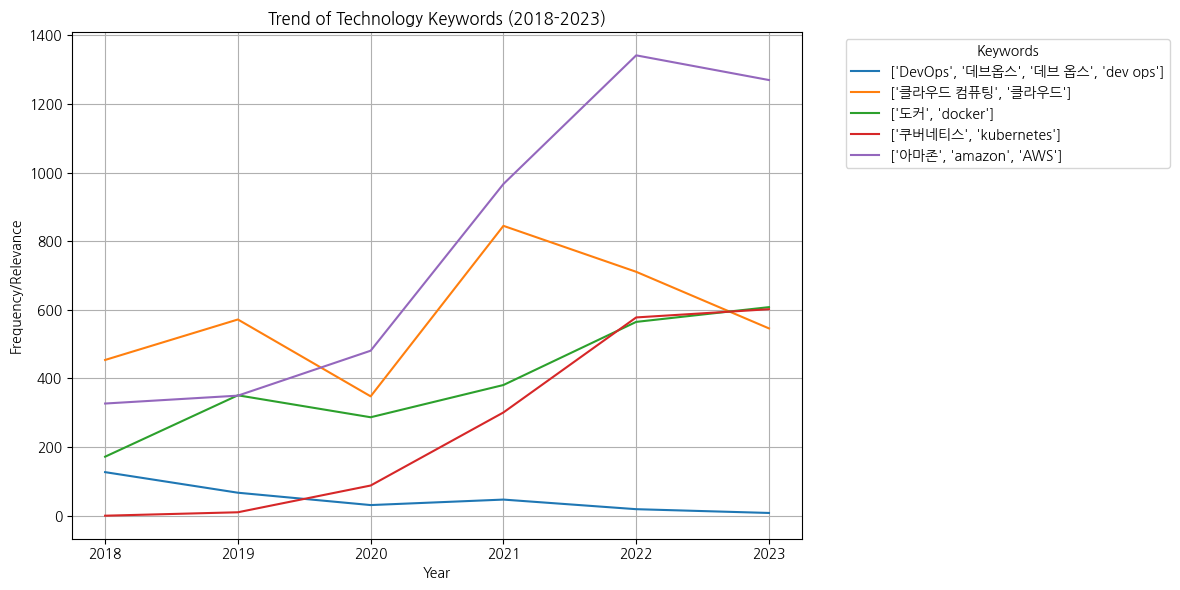

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
file_path = "/content/drive/MyDrive/대출 데이터 모음/연도별 키워드 처리/인프라 키워드.xlsx"

data = pd.read_excel(file_path)

# Converting the columns to a list for plotting
years = data.columns[1:].tolist()

# Plotting each keyword trend
plt.figure(figsize=(12, 6))
for index, row in data.iterrows():
    plt.plot(years, row[1:], label=row['키워드'])

plt.title('Trend of Technology Keywords (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Frequency/Relevance')
plt.legend(title='Keywords', bbox_to_anchor=(1.05, 1), loc='best')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()



